https://projecteuler.net/problem=31

Given a currency with coins 1c, 2c, 5c, 10c, 20c, 50c, 100c and 200c, let $a_{n}$ be the number of ways to make up n cent given the previous coins. Order does not matter, just the quantity of each coin used.

Consider the generating function $$f(z) = \sum_{n=0}^{\infty}a_{n}z^{n}$$

Then it follows that $$f(z) = \dfrac{1}{\left(1-z\right)\left(1-z^{2}\right)\left(1-z^{5}\right)\left(1-z^{10}\right)\left(1-z^{20}\right)\left(1-z^{50}\right)\left(1-z^{100}\right)\left(1-z^{200}\right)}$$

To see this, just expand out each term in the denumerator as a geometric series. Let's take $a_{4}$ as an example, which only requires 1c and 2c coins to compute. Then
$$f(z) = \left(1 + z + z^{2} + z^{3} + \dots\right)\left(1 + z^{2} + z^{4} + z^{6} + \dots\right)\left(\dots\right) \\
       = \left(z^{0} + z^{1} + z^{1+1} + z^{1+1+1} + \dots\right)\left(z^{0} + z^{2} + z^{2+2} + z^{2+2+2} + \dots\right)\left(\dots\right)$$
Let's just gather up just those terms contributing to the $z^{4}$ term in the Taylor series for $f(z)$:
$$z^{0}*z^{2+2} + z^{1+1}*z^{2} + z^{1+1+1+1} = z^{2+2} + z^{1+1+2} + z^{1+1+1+1} = z^{4} + z^{4} + z^{4} = 3z^{4}$$
So we see that each power in the expanded product above represents a fixed quantity of a given coin, and when these monomials are multiplied, the power of the resulting monomial is exactly the value of summing up the values of our coins. Thus the coefficient of $z^{n}$ in $f(z)$ is precisely the number of ways to make change for $n$ cent given the above coins.

How does this help? Well as a rational function, we could expand $f(z)$ in terms of a partial fraction decomposition. Then we could simply read off $a_{n}$ as the sum of coefficients of each term in the partial fraction decomposition. However this is not easily done. For example, the below code tries to do this "simply" with python's sympy package.

Aside: I believe we could get a computer to do this, as we have ways to optomise this that sympy isn't aware about. For example, we know precisely each of the poles of $f(z)$ and their order. So we could reduce this to a linear algebra problem (which I haven't done... yet).

In [1]:
import sympy as sp

In [2]:
z = sp.Symbol('z')

In [3]:
# Example case
(1/((1-z)*(1-z**2)*(1-z**3))).apart(full=True).doit()

-(-1/16 - 7*sqrt(3)*I/144 - (-1/2 - sqrt(3)*I/2)**2/72)/(z + 1/2 + sqrt(3)*I/2) - (-1/16 - (-1/2 + sqrt(3)*I/2)**2/72 + 7*sqrt(3)*I/144)/(z + 1/2 - sqrt(3)*I/2) + 1/(8*(z + 1)) - 17/(72*(z - 1)) + 1/(4*(z - 1)**2) - 1/(6*(z - 1)**3)

In [4]:
from functools import reduce
from operator import mul

In [6]:
coins = [1, 2, 5, 10, 20, 50, 100, 200]

In [7]:
f = 1/(reduce(mul, (1-z**n for n in coins)))

In [8]:
f

1/((1 - z)*(1 - z**2)*(1 - z**5)*(1 - z**10)*(1 - z**20)*(1 - z**50)*(1 - z**100)*(1 - z**200))

The below code is hanging on my machine.

In [1]:
# partial_fraction = f.apart(full=True)

For the time being, let's get navigate around this problem by finding the _leading_ behaviour of $a_{n}$ as $n\rightarrow\infty$. Let's still focus on the partial fraction representation, even though we have not explicitly calculated it. Every term in this expansion will be some scalar multiple of $1/(z_{0}-z)^{m}$ where $z_{0}$ will be a pole of $f(z)$. It follows from the binomial expansion that
$$\dfrac{1}{\left(z_{0} - z\right)^{m}} = \dfrac{\left(1-\frac{z}{z_{0}}\right)^{-m}}{z_{0}^{m}} \\
 = \dfrac{1}{z_{0}^{m}}\sum_{n=0}^{\infty}(-1)^{n}{-m \choose n} \left(\frac{z}{z_{0}}\right)^{n}$$
The curious negative binomial coefficient can be expanded easily enough:
$$ (-1)^{n}{-m \choose n} = (-1)^{n}\dfrac{(-m)(-m - 1)(-m - 2)\dots(-m-n+1)}{n!} = \dfrac{(m)(m + 1)(m + 2)\dots(m+n-1)}{n!} = \binom{m+n-1}{n} = \binom{m+n-1}{m-1}\\ \sim \dfrac{n^{m}}{z_{0}^{n}}$$
Here $\sim$ denotes asymptotic equivalenve as $n\infty$.

In our case, we know that all the poles of $f(z)$ lie on the unit circle, so $\left|z_{0}^{n}\right|\sim 1$. Thus _poles of order $m$ contribute a term of order $n^{m}$ to $a_{n}$_. Further, _the asymptotic behaviour of $a_{n}$ is determined by the pole(s) of largest order of $f(z)$._

We can compute the order of each pole easily enough by expanding each term in the product of $f(z)$ using roots of unity:
$$
f(z) = \prod_{c\in S}\dfrac{1}{1-z^{c}} = \prod_{c\in S}\dfrac{1}{z^{c} - 1}\\
     = \prod_{c\in S}\prod_{k=0}^{c-1}\left(z-\exp\left(\frac{i 2\pi k}{c}\right)\right)^{-1} \\
     = \prod_{c\in S}\prod_{k=0}^{c-1}\left(z-\exp\left(\frac{i 2\pi (200/c)k}{200}\right)\right)^{-1} \\
$$
where $S={1,2,5,10, 20, 50, 100, 200}$. Note we were able to change the sign of the denominator terms on the first line because we had an even number of coins. Also, we are using that every $c\in S$ divides 200. In the above double product, all terms are of the form $\left(z-\exp\left(\frac{i 2\pi l}{200}\right)\right)^{-1}$, it just remains to count how many terms there are for each $l$. Then each $c\in S$ contributes exactly one term of the previous form to $f(z)$ if $l=(200/c)k$ for some integer $k$, i.e. if $l$ is a multiple of $200/c$. Let $S' = {200, 100, 40, 20, 10, 4, 2, 1}$ be the set formed by dividing $200$ by each $c\in S$.
$$
\Rightarrow f(z) = \prod_{l=0}^{200}\left(z-\exp\left(\frac{i 2\pi l}{200}\right)\right)^{-m}
$$
where
$$m(l) = \left|\left\{c' \in S' | c \; \textrm{divides} \; l \right\}\right|$$
From this, we know that $f(z)$ has exactly $200$ poles along the $200$-th roots of unity. Further, the pole at $z=1$ ($l=0$) has the highest order of order $8$ as every coin in $S$ contributes one order to this pole. Thus $a_{n}$ behaves asymptotically like $\binom{7+n}{7} \sim n^{7}$.

In [1]:
c = 1*2*5*10*20*50*100*200

In [2]:
c

2000000000

However, the predictive power of this result is still limited, as we don't know the multiplicative factor for this asymptotic result yet. Observe that $$1-z^{n} = (1-z)(1+z+\dots+z^{n-1})
\Rightarrow \dfrac{1}{1-z^{n}} \sim \dfrac{1}{n}\dfrac{1}{1-z}$$
where $\sim$ means approximately equal close to $z=1$. We can plug this into the product result for $f(z)$ to approximate $f(z)$ about $z=1$:
$$f(z) = \prod_{c\in S}\dfrac{1}{1-z^{c}} \\
      \sim \prod_{c\in S} \dfrac{1}{c}\dfrac{1}{1-z} = \dfrac{\left(1-z\right)^{8}}{C}$$
where $C = \prod_{c \ in S} c = 2*10^{9}$
Thus we arrive at our approximation:
$$a_{n} \sim \dfrac{\binom{7+n}{7}}{2*10^{9}}  \sim \dfrac{n^{7}}{2*10^{9}*7!}$$

We can get the next order correction by looking at poles of order 7. The pole of next lowest order is that at $z=-1=e^{-i2\pi 100/200}$ which is of order 6.

We can also use $f(z)$ to derive a recursive relation for $a_{n}$.
$$
f(z) = \prod_{c\in S}\dfrac{1}{1-z^{c}} \\
\Rightarrow \log\left(f(z)\right) = - \sum_{c \in S} \log\left(1-z^{c}\right) \\
\Rightarrow \dfrac{f'(z)}{f(z)} = \sum_{c \in S} \dfrac{c z^{c-1}}{1-z^{c}} = \sum_{c \in S} c \sum_{n\geq 1} z^{nc-1} \\
\Rightarrow f'(z) = f(z) * g(z)
$$
where $g(z) = \sum_{c \in S} c z^{c-1}/\left(1-z^{c}\right)$. Let the coefficients of the taylor series of $g(z)$ be given by $b_{n}$. These are easily computed by using geometric series and summing over $S$. Then
$$
(n+1)a_{n+1} = a_{n} \star b_{n}
$$
where $\star$ denotes the Cauchy product of infinite sequences.

In [1]:
from functools import lru_cache, reduce

In [2]:
from functools import lru_cache

s = [1,2,5,10, 20, 50, 100, 200]

In [3]:
@lru_cache(maxsize=1000)
def g(n):
    return sum(c for c in s if (n+1) % c  == 0)

In [4]:
@lru_cache(maxsize=1000)
def f_linear_recursive(n):
    if n == 0:
        return 1
    
    terms = (f_linear_recursive(i)*g(n-1-i) for i in range(n))
    
    return int(sum(terms)/n)

In [5]:
f_linear_recursive(1000)

321335886

In [6]:
[f_linear_recursive(n) for n in range(10)]

[1, 1, 2, 2, 3, 4, 5, 6, 7, 8]

In [7]:
from operator import mul
from math import comb, log, factorial

In [8]:
C = reduce(mul, s)

def f_asymptotic(n):
    return comb(n+7, 7)/C

In [10]:
results_1 = [log(f_linear_recursive(n)) for n in range(1, 1000)]
results_2 = [log(f_asymptotic(n)) for n in range(1, 1000)]

In [11]:
import matplotlib.pyplot as plt

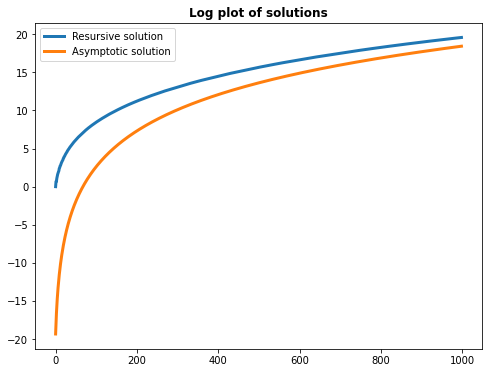

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title("Log plot of solutions", fontweight='bold')

ax.plot(results_1, label='Resursive solution', linewidth=3.0)
ax.plot(results_2, label='Asymptotic solution', linewidth=3.0)

ax.legend(loc='upper left')

fig.show()

In [16]:
f_linear_recursive(1000)

321335886